In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import os

PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
PATH_TO_DATA += "data/2018-full-1d/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
btc_df = pd.read_csv(PATH_TO_DATA + "BTCUSDT_2018_1DAY_Binance.csv", sep='\t')
eth_df = pd.read_csv(PATH_TO_DATA + "ETHUSDT_2018_1DAY_Binance.csv", sep='\t')
neo_df = pd.read_csv(PATH_TO_DATA + "NEOUSDT_2018_1DAY_Binance.csv", sep='\t')
xrp_df = pd.read_csv(PATH_TO_DATA + "XRPUSDT_2018_1DAY_Binance.csv", sep='\t')
eos_df = pd.read_csv(PATH_TO_DATA + "EOSUSDT_2018_1DAY_Binance.csv", sep='\t')

In [3]:
btc_open = btc_df["open"].values
eth_open = eth_df["open"].values
neo_open = eth_df["open"].values
xrp_open = eth_df["open"].values
eos_open = eos_df["open"].values

In [4]:
from scipy.stats.stats import pearsonr, spearmanr

print("eth/btc")
print(spearmanr(btc_open,eth_open)[0])
print(pearsonr(btc_open,eth_open)[0])
print("neo/btc")
print(spearmanr(btc_open,neo_open)[0])
print(pearsonr(btc_open,neo_open)[0])

eth/btc
0.913160997881185
0.8903427524115283
neo/btc
0.913160997881185
0.8903427524115283


In [5]:
data = {'btc_open'  : btc_df["open"],
        'btc_close' : btc_df["close"],
        'change(btc), %' : round(btc_df["close"]/btc_df["open"]*100-100, 2), 
        'eth_open'  : eth_df["open"],
        'eth_close' : eth_df["close"],
        'change(eth), %' : round(eth_df["close"]/eth_df["open"]*100-100, 2),
        'neo_open'  : neo_df["open"],
        'neo_close' : neo_df["close"],
        'change(neo), %' : round(neo_df["close"]/neo_df["open"]*100-100, 2),  
        'xrp_open'  : xrp_df["open"],
        'xrp_close' : xrp_df["close"],
        'change(xrp), %' : round(xrp_df["close"]/xrp_df["open"]*100-100, 2),        
        'eos_open'  : eos_df["open"],
        'eos_close' : eos_df["close"],
        'change(eos), %' : round(eos_df["close"]/eos_df["open"]*100-100, 2)
       }
merged = pd.DataFrame(data=data)
merged.head().T

,0,1,2,3,4
btc_open,13715.6500,13382.1600,14690.00000,14919.51000,15059.56000
btc_close,13380.0000,14675.1100,14919.51000,15059.54000,16960.39000
"change(btc), %",-2.4500,9.6600,1.56000,0.94000,12.62000
eth_open,733.0100,754.9900,855.13000,934.03000,940.00000
eth_close,754.9900,855.2800,934.03000,940.00000,959.30000
"change(eth), %",3.0000,13.2800,9.23000,0.64000,2.05000
neo_open,74.8540,78.2550,89.60000,103.50600,97.66900
neo_close,78.2990,89.6960,103.50500,97.66900,95.13400
"change(neo), %",4.6000,14.6200,15.52000,-5.64000,-2.60000
xrp_open,0.5000,0.8898,0.90280,0.86482,0.82490


In [6]:
print("mean(change):")
print(np.mean(abs(merged['change(btc), %'])))
print(np.mean(abs(merged['change(eth), %'])))
print(np.mean(abs(merged['change(neo), %'])))
print(np.mean(abs(merged['change(xrp), %'])))
print(np.mean(abs(merged['change(eos), %'])))

mean(change):
3.056475409836066
4.183087431693989
5.313907103825137
4.2620164609053495
4.353881278538812


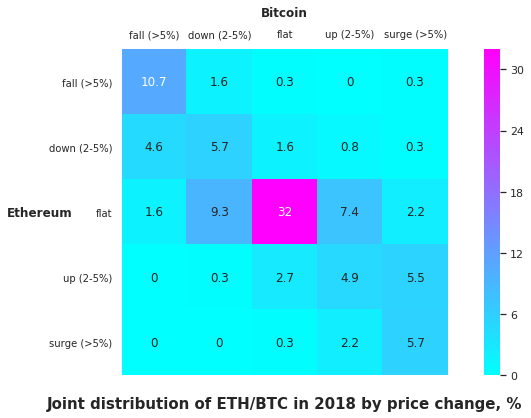

In [7]:
from dataviz import Viewer
plt.figure(figsize(13,6))
    
ax = Viewer().joint_distribution_view(merged['change(btc), %'], merged['change(eth), %'], 
                                 normalized=True, percents=True,
                                 title="Joint distribution of ETH/BTC in 2018 by price change, %", 
                                 xlabel="Bitcoin", ylabel="Ethereum")

In [8]:
Viewer().correlate(merged['change(btc), %'], merged['change(eth), %'])

(59.0, 93.9)

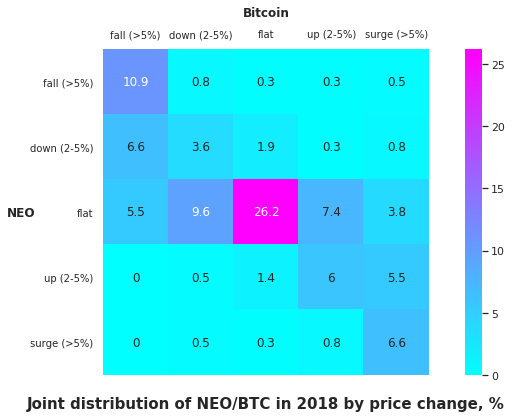

In [9]:
from dataviz import Viewer
ax = Viewer().joint_distribution_view(merged['change(btc), %'], merged['change(neo), %'], 
                                 normalized=True, percents=True,
                                 title="Joint distribution of NEO/BTC in 2018 by price change, %", 
                                 xlabel="Bitcoin", ylabel="NEO")

In [10]:
Viewer().correlate(merged['change(btc), %'], merged['change(neo), %'])

(53.3, 87.3)

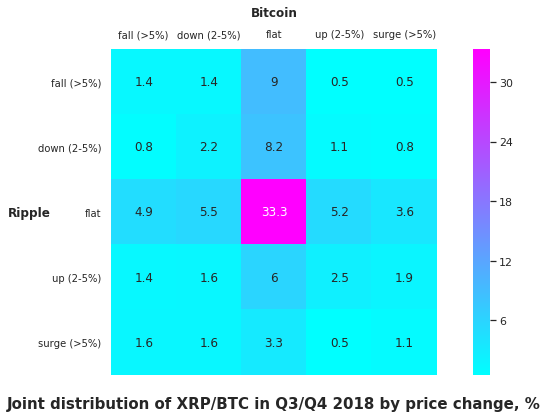

In [11]:
from dataviz import Viewer
ax = Viewer().joint_distribution_view(merged['change(btc), %'], merged['change(xrp), %'], 
                                 normalized=True, percents=True,
                                 title="Joint distribution of XRP/BTC in Q3/Q4 2018 by price change, %", 
                                 xlabel="Bitcoin", ylabel="Ripple")

In [12]:
Viewer().correlate(merged['change(btc), %'], merged['change(xrp), %'])

(40.5, 70.0)

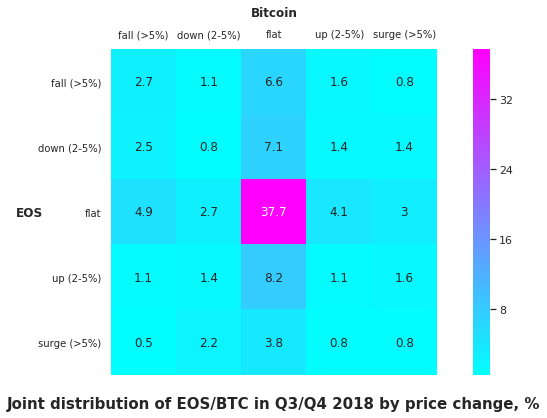

In [13]:
ax = Viewer().joint_distribution_view(merged['change(btc), %'], merged['change(eos), %'], 
                                 normalized=True, percents=True,
                                 title="Joint distribution of EOS/BTC in Q3/Q4 2018 by price change, %", 
                                 xlabel="Bitcoin", ylabel="EOS")

In [14]:
Viewer().correlate(merged['change(btc), %'], merged['change(eos), %'])

(43.1, 71.2)